# How are in-demand skills trending for data scientists?

Methodology
1. Aggregate skill counts monthly
2. Re-analyze based on percentage of total jobs
3. Plot the monthly skill demand

In [2]:
# import libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# load data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# clean data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\jgribbl1\OneDrive - Burlington\Documents\Python\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# filter to just data scientists in the US
df_ds_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].copy()

In [4]:
# create a new job_posted_month column to aggregate on
df_ds_US['job_posted_month_no'] = df_ds_US['job_posted_date'].dt.month

In [5]:
# explode out the job skills
df_ds_US_explode = df_ds_US.explode('job_skills')

In [6]:
# create a pivot table from this exploded dataset
df_ds_US_explode.pivot_table(index = 'job_posted_month_no', columns = 'job_skills', aggfunc = 'size', fill_value = 0)

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,watson,webex,windows,wire,word,workfront,wrike,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,184,3,137,47,0,16,4,8,8,10,...,14,1,90,16,289,0,0,0,11,16
2,121,2,86,20,1,6,5,5,0,16,...,6,1,80,4,238,0,0,0,22,5
3,95,1,61,19,0,5,8,6,1,7,...,12,0,76,4,201,1,0,0,0,19
4,111,0,57,14,1,4,13,2,2,8,...,9,1,96,5,206,0,0,0,3,11
5,93,8,34,12,1,10,3,4,1,4,...,4,0,58,2,187,0,0,2,2,13
6,64,7,61,20,0,7,8,4,8,10,...,4,1,95,0,166,0,1,1,6,12
7,91,3,77,17,0,2,8,0,6,6,...,14,1,70,3,174,0,0,0,21,25
8,116,3,83,29,0,8,12,0,3,8,...,6,3,100,2,234,0,0,0,15,12
9,76,3,51,15,0,16,9,3,3,2,...,10,3,51,1,167,0,0,0,8,7


In [7]:
# assign this pivot table to a new dataframe, find the sum of each of the job skill columns, then sort the skills based on their totals
df_ds_US_pivot = df_ds_US_explode.pivot_table(index = 'job_posted_month_no', columns = 'job_skills', aggfunc = 'size', fill_value = 0)

df_ds_US_pivot.loc['Total'] = df_ds_US_pivot.sum()

df_ds_US_pivot = df_ds_US_pivot[df_ds_US_pivot.loc['Total'].sort_values(ascending = False).index]

df_ds_US_pivot = df_ds_US_pivot.drop('Total')

In [8]:
# now turn these job skill counts into percentages (job skills being in what percentage of total job postings)

# find how many total job postings in each month
ds_totals = df_ds_US.groupby('job_posted_month_no').size()

In [9]:
# use .div() method to divide the pivoted dataframe by the ds_totals dataframe to find the percentage of each skill in the total jobs posted for each month
df_ds_US_percent = df_ds_US_pivot.div(ds_totals/100, axis = 0)

In [10]:
# change the month column from numbers to month names
df_ds_US_percent = df_ds_US_percent.reset_index()
df_ds_US_percent['job_posted_month'] = df_ds_US_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format = '%m').strftime('%b'))
df_ds_US_percent = df_ds_US_percent.set_index('job_posted_month')
df_ds_US_percent = df_ds_US_percent.drop(columns = 'job_posted_month_no')

In [11]:
df_ds_US_percent

job_skills,python,sql,r,sas,tableau,aws,spark,java,tensorflow,azure,...,asp.net core,clickup,couchdb,fedora,ocaml,mattermost,nuix,shogun,symfony,wrike
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,75.820680,54.519161,48.618944,24.584237,23.571945,19.725235,19.609544,13.246565,12.957339,11.814895,...,0.014461,0.014461,0.014461,0.000000,0.000000,0.000000,0.014461,0.000000,0.014461,0.000000
Feb,75.020178,53.874092,47.094431,23.083132,25.585149,17.231638,18.058918,13.014528,11.400323,11.561743,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,71.019042,50.763758,45.804562,23.938062,23.561415,17.744298,16.467880,12.031806,11.069261,11.257585,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020925,0.000000,0.000000
Apr,74.419560,50.606123,44.811999,24.738032,24.922950,18.122046,16.909801,12.779947,11.958085,11.054037,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,73.840530,52.387480,46.058944,26.273703,26.822024,18.208819,17.683345,14.370573,11.811743,11.903130,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,73.864370,52.572659,45.360603,24.930032,24.434876,17.610334,17.696448,12.615716,11.560818,12.228202,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021529
Jul,72.621001,50.840853,45.324036,22.682527,25.082034,17.637408,16.447908,11.915505,11.689910,12.448728,...,0.000000,0.000000,0.000000,0.020509,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,72.269706,52.611586,45.837290,25.292814,24.058246,17.030706,17.014878,12.139918,12.804685,11.506806,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,68.126095,47.176007,39.207531,25.350263,20.161996,15.258319,16.199650,11.690018,12.412434,12.215412,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


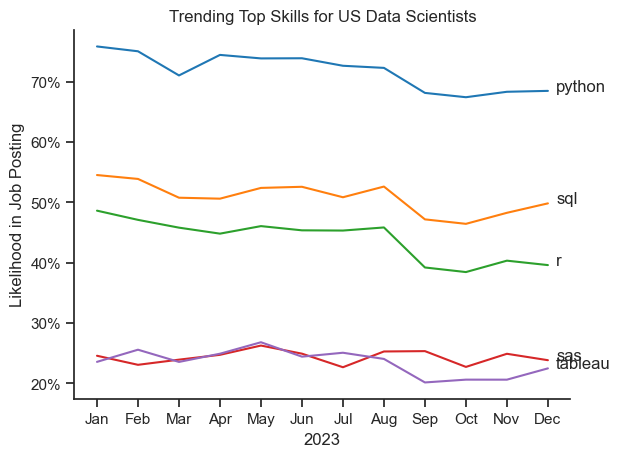

In [20]:
# limit dataframe to first five columns (top five skills)
df_plot = df_ds_US_percent.iloc[:, :5]

# plot using a Seaborn line plot
sns.lineplot(data = df_plot, dashes = False, palette = 'tab10')
sns.set_theme(style = 'ticks')
sns.despine()

plt.title('Trending Top Skills for US Data Scientists')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter())

for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i])